In [1]:
from dataloader import TACO,DatasetType
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = TACO(ds_type = DatasetType.train)

Number of images in dataset: 1000


In [3]:
batch_size = 16
loader = torch.utils.data.DataLoader(dataset, batch_size, shuffle=False, num_workers=1)

### Analyse image sizes

In [ ]:
s = []
for i in range(dataset.__len__()):
    s.append(dataset.__getitem__(i)[0].shape)
ss = torch.tensor(s)
plt.hist(ss[:,1])
min(ss[:,2])

In [ ]:
def get_img_info(image_loader):
    images, labels = next(iter(image_loader))
    plt.figure(figsize=(20,10))

    for i in range(21):
        plt.subplot(5,7,i+1)
        img = images[i]
        img = img.numpy()
        plt.imshow(np.transpose(img, (1, 2, 0)))
        plt.title(labels[i].item())
        plt.axis('off')

    print('Image shape: ', type(images[i].numpy().shape))

### Randomly split

In [ ]:
inds = np.random.permutation(np.arange(0,1500))
inds[0:250]
inds[250:500]
np.setdiff1d(np.arange(0,1500),inds[0:500])

### Show some images

In [7]:
def get_img_info(image_loader):
    images, labels = next(iter(image_loader))
    plt.figure(figsize=(20,10))

    for i in range(21):
        plt.subplot(5,7,i+1)
        img = images[i]
        img = img.numpy()
        plt.imshow(np.transpose(img, (1, 2, 0)))
        plt.title(labels[i].item())
        plt.axis('off')

    print('Image shape: ', type(images[i].numpy().shape))

#get_img_info(image_loader)

item 66 and item 1

img id: 99
tensor([  0.0000,   0.0000, 374.5098, 310.1103])
tensor([ 12.7451,  13.0515, 185.7843, 120.2206])
tensor([  0.0000, 200.9191, 474.5098, 322.7941])
tensor([270.0981, 158.2720, 149.7549,  62.3162])
tensor([368.8726,  73.7132, 133.0882, 104.2279])
tensor([453.4314, 185.1103, 146.5686,  97.6103])
tensor([415.1961, 133.6397, 147.5490,  98.8971])
tensor([562.2549, 211.7647,  37.7451,  29.5956])
tensor([233.8235, 290.8088, 365.6863, 237.1324])
tensor([233.5784, 489.5221,  42.4020,  38.7868])
tensor([  0.0000, 478.1250, 212.7451, 113.4191])
tensor([181.1275, 457.3529, 172.5490, 104.7794])
tensor([354.6569, 438.9706, 245.3431, 161.0294])


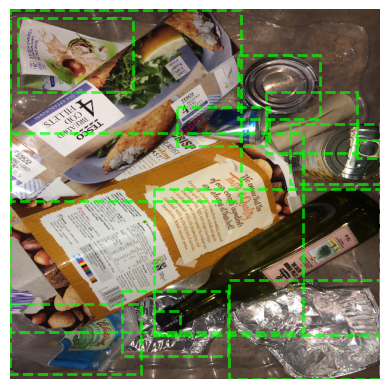

In [22]:
id = 66
print(f'img id: {dataset.img_ids[id]}')
data = dataset.__getitem__(id)
fig,ax = plt.subplots(1)
plt.imshow(np.transpose(data[0].numpy(), (1, 2, 0)))
plt.axis('off')
for seg in data[1]:
    #print(seg)
    rect = plt.Rectangle((seg[0],seg[1]),seg[2],seg[3],linewidth=2,edgecolor='lime',
                         facecolor='none', alpha=0.7, linestyle = '--')
    ax.add_patch(rect)

In [23]:
root_dir="/dtu/datasets1/02514/data_wastedetection"

In [25]:
bb_file_path = "bounding_boxes_quality.pt"
proposals = torch.load(bb_file_path)

In [29]:
len(proposals[99])

14569

img id: 99


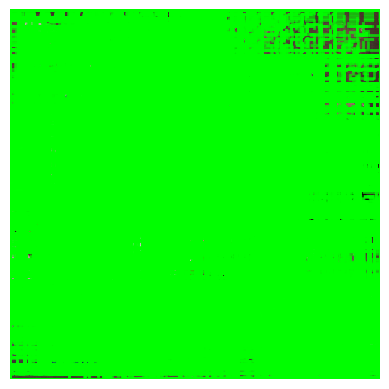

In [30]:
id = 66
print(f'img id: {dataset.img_ids[id]}')
data = dataset.__getitem__(id)
fig,ax = plt.subplots(1)
plt.imshow(np.transpose(data[0].numpy(), (1, 2, 0)))
plt.axis('off')
for seg in proposals[99]:
    #print(seg)
    rect = plt.Rectangle((seg[0],seg[1]),seg[2],seg[3],linewidth=2,edgecolor='lime',
                         facecolor='none', alpha=0.7, linestyle = '--')
    ax.add_patch(rect)